In [1]:
from bs4 import BeautifulSoup
import requests
import multiprocessing as mp
import pandas as pd
import re
from nltk.stem import RSLPStemmer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [2]:
def getPage(url):
    html = requests.get(url).content
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.findAll('a', {'class': 'feed-post-link gui-color-primary gui-color-hover'})
    print( 'processed page'  + url)
    return list(dict.fromkeys([link.get('href') for link in links if link.text != None and link.get('href') != None]))

In [3]:
def get_true_and_text(url): 
    try:
        resp = requests.get(url)
        if(resp.status_code != 200):
            raise Exception('Error executing http call')

        html = resp.content
        soup = BeautifulSoup(html, 'html.parser')
        text = soup.find('h2', {'class': 'content-head__subtitle'}).text
        
        return (True, text)
    except Exception as e:
        print('##### ERROR - ' + str(e))
        return (None, None)

In [4]:
base_url = "https://g1.globo.com/index/feed/pagina-{0}.ghtml"
pool = mp.Pool(mp.cpu_count())

v_links = []
pages = []
for i in range(1, 150):
    pages.append(base_url.format(i))

results = [pool.apply(getPage, args=((p,))) for p in pages]
pool.close()  
[v_links.extend(r) for r in results]
v_links = list(dict.fromkeys(v_links))

processed pagehttps://g1.globo.com/index/feed/pagina-1.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-2.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-3.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-4.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-5.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-6.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-7.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-8.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-9.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-10.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-11.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-12.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-13.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-14.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-15.ghtml
processed pagehttps://g1.globo.com/index/feed/pagina-16.ghtml
processed pagehtt

In [5]:
df = pd.DataFrame(v_links)
df.to_csv('generated/g1_verified_links.csv', index=False)

In [6]:
pool = mp.Pool(mp.cpu_count())
results_get_fake = [pool.apply(get_true_and_text, args=((p,))) for p in v_links]
pool.close()  

df = pd.DataFrame(results_get_fake)
df.to_csv('generated/results_get_real.csv', index=False)

##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute 'text'
##### ERROR - 'NoneType' object has no attribute

In [9]:
df = pd.read_csv('generated/results_get_real.csv')
df['0'] = df['0'].astype(bool)
df['1'] = df['1'].astype(str)
df = df[df['0'] == True]

df.info()
print(df['0'].value_counts())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1454
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1455 non-null   bool  
 1   1       1455 non-null   object
dtypes: bool(1), object(1)
memory usage: 24.2+ KB
True    1455
Name: 0, dtype: int64


,0,1
0,True,Os que tomaram as duas doses ou vacina de dose única chegaram a 106.874.272. Levantamento é do consórcio de veículos de imprensa com base em informações das secretarias estaduais de saúde.
1,True,"Lista completa dos pedidos de indiciamento tem três filhos do presidente da República, ministros e deputados. Relator Renan Calheiros vai ler seu parecer final em sessão da CPI."
2,True,"Relatório final da comissão deve apontar que Bolsonaro responda por crimes como charlatanismo, epidemia com morte e fraude de documentos."
3,True,"Bolsonaro, Pazuello, donos da Prevent Senior, Carlos Wizard e Luciano Hang estão entre os citados. Saiba quais são os crimes atribuídos a cada um."
4,True,Relator pede indiciamento do presidente Jair Bolsonaro por 9 crimes. Outras 65 pessoas e 2 empresas também foram indiciadas.
5,True,nan
6,True,"Texto foi entregue ao Senado nesta quarta. Antes, relator apresentou duas minutas. Veja o conteúdo de todos os textos."
7,True,"Troca de ofensas, prisão de Roberto Dias, machismo contra senadora, discurso anti-homofobia e depoimentos emocionados estão entre os principais momentos da CPI da Covid."
8,True,"O autônomo Marconi Torres, de Serra Talhada (PE), frequentava bares e outros locais com dezenas de pessoas sem máscara. ‘Foi preciso eu pagar o preço pra ter medo’, diz, após ficar uma semana internado por causa da Covid-19. Nesta semana, o g1 publica uma série de reportagens com histórias de pessoas que sofreram na pele as consequências do negacionismo e das fake news."
9,True,Carlesse ainda não se manifestou. PF faz buscas na casa dele e na sede do governo estadual. Objetivo é apurar suspeita de pagamento de propina relacionada ao plano de saúde dos servidores estaduais e obstrução de investigações.


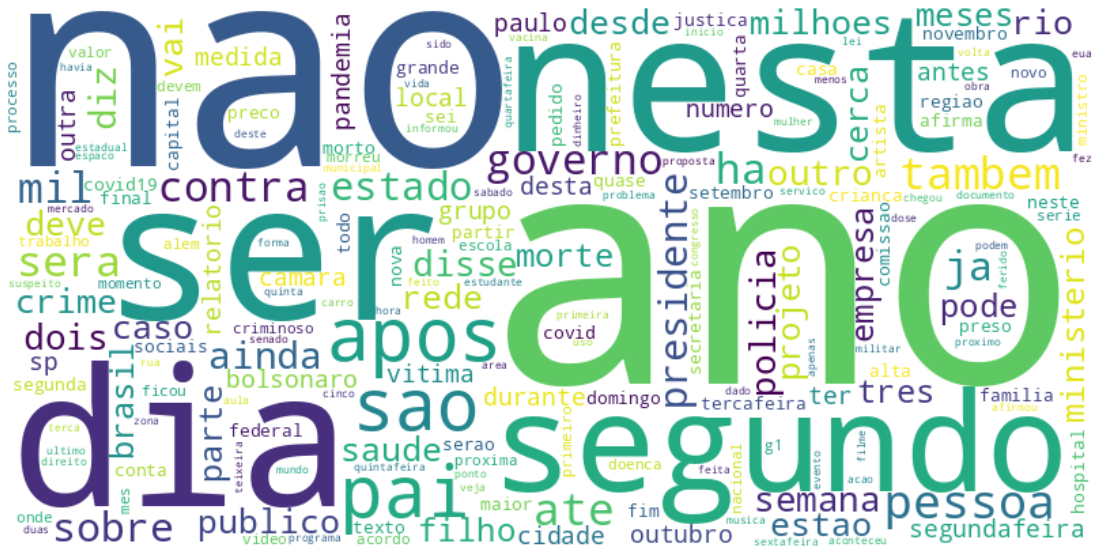

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1454
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1351 non-null   bool  
 1   1       1351 non-null   object
dtypes: bool(1), object(1)
memory usage: 22.4+ KB
True    1351
Name: 0, dtype: int64


,0,1
0,True,tom dua dos vacin dos unic cheg 106874272 levant consorci veicul imprens bas informaco secret estad saud
1,True,list complet ped indic tre filh presid republ ministr deput rela renan calh vai ler parec final sessa cpi
2,True,relatori final comissa dev apont bolsonar respond crim charlatan epidem mort fraud document
3,True,bolsonar pazuell don prevent seni carl wizard luci hang esta cit saib qual sao crim atribu cad
6,True,text entreg sen nest quart ant rela apresent dua minut vej conteud tod text
7,True,troc ofens prisa robert dia mach contr sen discurs antihomofob depo emocion esta princip moment cpi covid
8,True,auton marcon torr serr talh pe frequent bar outr local dezen pesso masc precis pag prec pra ter med diz apo fic seman intern caus covid19 nest seman g1 publ seri report hist pesso sofr pel consequenc negacion fak new
9,True,carl aind nao manifest pf faz busc cas sed govern estad obje apur suspeit pag propin relacion plan saud serv estad obstruca investigaco
10,True,isaac prim sen dav alcolumbr nao alv operaca aerodr exdeput funcion local abastec manutenca aeronav us distribu entorpec vind colomb venezuel
13,True,pilot azul vinh port alegr decid abort pous dev condico temp apes chuv aeroport nao cheg fech


In [10]:
remove_pontuacao = lambda x:  re.sub(r'[^\w\s]', '', x)
remove_quebra_linha = lambda x:  re.sub(r'\\n', ' ', x)
remove_tabulacao = lambda x:  re.sub(r'\\t', ' ', x)
remove_multiplos_espacos = lambda x:  re.sub(' +', ' ', x)

stemmer = RSLPStemmer()
stopws = stopwords.words('portuguese')

df['1'] = df['1'].map(remove_quebra_linha).map(remove_tabulacao).map(remove_multiplos_espacos).map(remove_pontuacao)

df['1'] = df['1'].str.lower()
df['1'] = df['1'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['1'] = df['1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopws)]))
df['1'] = df['1'].str.strip()

df.replace('', None, inplace=True)
df.drop_duplicates(subset='1', keep='last', inplace=True)
df.dropna(inplace=True)
df['1'] = df['1'].str.lower()
df['1'] = df['1'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

words = " ".join(df['1'])
word_cloud = WordCloud(width=800, height=400, collocations = False, background_color = 'white').generate(words)
plt.figure( figsize=(20,10) )
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

df['1'] = df['1'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))
df.to_csv('generated/results_get_real_built.csv', index=False)
df.info()
print(df['0'].value_counts())
df.head(10)